# BAFU dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the BAFU dataset into hourly and daily resolutions. The output is one file per catchemnt (similar to the CAMELS_CH), with 5 columns: date, electric_cond(µS/cm), pH(-), temperature(°C) & oxygen_conc(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [2]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl



# Configurations

In [3]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [4]:
# Non-editable variables:
PATH_OUTPUT = "results/timeseries/"

# Set the directory:
os.chdir(PATH)

In [5]:
os.getcwd()

'c:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Scripts\\CAMELS_CH_chem'

# Import data
* Full table

In [6]:
# Full dataset
path = r'data\phys_daten_BAFU\phys_daten_BAFU\\'

filenames = glob.glob(path + "*.csv")
len(filenames)

423

In [7]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v2.xlsx", sheet_name='all_4')
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lon_naduf,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,557660.0,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,657000.0,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,662830.0,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,663700.0,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [89]:
# Read the shapefile of Switzerland
ch_shapefile = gpd.read_file(r'data\shps\switzerland.shp')
ch_shapefile

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [44]:
# Create GeoDataFrame, specifying the geometry column with Point objects (lon, lat)
network_camels_ch_chem_gdf = gpd.GeoDataFrame(network_camels_ch_chem, geometry=gpd.points_from_xy(network_camels_ch_chem['lon'], network_camels_ch_chem['lat']), crs="EPSG:21781")  # Swiss CH1903/LV03 CRS

# Convert to WGS84 (EPSG:4326)
network_camels_ch_chem_gdf = network_camels_ch_chem_gdf.to_crs("EPSG:4326")

network_camels_ch_chem_gdf["x_coord"] = network_camels_ch_chem_gdf.geometry.x
network_camels_ch_chem_gdf["y_coord"] = network_camels_ch_chem_gdf.geometry.y

network_camels_ch_chem_gdf.set_index("basin_id", inplace=True)

In [10]:
network_camels_ch_chem_gdf.y_coord.min()

45.97199536210988

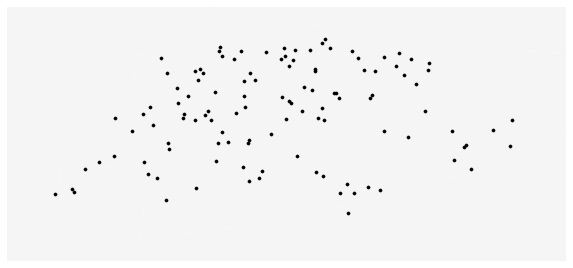

In [11]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Create a 2x1 subplot grid
fig, axs = plt.subplots(1, 1, figsize=(8, 5))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='none', linewidth=0.1)
#axs.set_xlim(-24, 45) 
#axs.set_ylim(35, 70)  

#catchment_boundaries.plot(ax=axs, facecolor='None', edgecolor='royalblue', linewidth=0.05,  alpha=0.70)

axs.set_xlim(5.5, 11) 
axs.set_ylim(45.5, 48)  

# Plot the gauges
axs.scatter(network_camels_ch_chem_gdf['x_coord'], network_camels_ch_chem_gdf['y_coord'], color='black', edgecolor='black',linewidth=0.5,
            marker='o', s=10, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_axis_off()  # Turn off both x-axis and y-axis

# Plot invisible scatter plot for legend
axs.plot([], [], color='royalblue', linewidth=0.8, label='Catchemnt boundaries')

#axs.legend(['Streamflow gauges', 'Catchment boundaries'], loc='lower left', frameon=False)


# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
#plt.show()
#plt.savefig('results/figure1_pointsandboundaries.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

In [44]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp'].count()
    ec_count = df['EC'].count()
    o_count = df['o'].count()
    ph_count = df['ph'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_daily_df

  0%|          | 0/87 [00:00<?, ?it/s]

100%|██████████| 87/87 [00:01<00:00, 80.27it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,17897,16360,16641,16574
2011,17897,16360,16641,16574
2016,17897,15501,15810,15467
2018,17897,8566,8778,8692
2019,17897,8566,8778,8692
...,...,...,...,...
2615,1678,15905,16430,16151
2617,7305,15905,16430,16151
2623,7305,7125,7289,7357


In [46]:
# Define the path where the CSV files are located
path = r"results/timeseries/hourly"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp'].count()
    ec_count = df['EC'].count()
    o_count = df['o'].count()
    ph_count = df['ph'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_hourly_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_hourly_df

100%|██████████| 87/87 [00:29<00:00,  2.96it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,429505,394170,399294,397636
2011,429505,394170,399294,397636
2016,429505,378348,379168,371028
2018,429505,205707,210556,208466
2019,429505,205707,210556,208466
...,...,...,...,...
2615,40272,386580,394295,387672
2617,181177,386580,394295,387672
2623,175297,172272,174936,176592


In [242]:
# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    delta_2h_count = df['delta_2h'].count()
    delta_18o_count = df['delta_18o'].count()

    # Store the results as a tuple (or list)
    data.append([file_number, delta_2h_count, delta_18o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_isotopes_df = pd.DataFrame(data, columns=['camels_id', 'delta_2h_count', 'delta_18o_count']).set_index('camels_id')

counts_isotopes_df

100%|██████████| 9/9 [00:00<00:00, 254.68it/s]


,delta_2h_count,delta_18o_count
camels_id,,
2009,445,448
2016,434,437
2019,401,402
2030,300,301
2068,340,342
2174,157,157
2462,283,283
2473,382,385
2613,314,499


In [153]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NADUF"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 2  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values for all columns starting from the specified index
    counts = df.iloc[:, start_column_index:].count()
    
    # Store the file number and the counts as a row in the result
    row = [file_number] + counts.tolist()
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
columns = ['camels_id'] + df.columns[start_column_index:].tolist()  # Use the column names from the CSV file
counts_naduf_df = pd.DataFrame(data, columns=columns).set_index('camels_id')
counts_naduf_df

100%|██████████| 24/24 [00:00<00:00, 103.45it/s]


,q_mean,temp_water,ph,EC,phlab,EClab,OS,hardness,alkalinity,TN,...,mg,mn,na,ni,no3,o,pb,so4,sr,zn
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,1043,1043,1010,1021,939,946,1016,1014,1016,996,...,1015,0,1016,141,1016,1016,479,1016,0,487
2016,1043,1043,958,957,673,686,937,975,977,949,...,981,0,981,0,985,937,102,980,0,97
2018,417,417,378,391,386,381,388,382,383,389,...,387,0,389,0,389,388,25,389,0,46
2044,1027,1027,815,813,931,935,798,935,933,898,...,938,0,943,48,936,798,183,943,0,173
2067,196,186,0,0,191,190,0,191,191,173,...,191,0,190,0,190,0,0,192,0,0
2068,388,388,376,379,378,379,378,380,380,368,...,380,0,380,0,381,378,0,381,0,0
2085,677,677,578,579,644,646,567,647,647,633,...,645,0,647,0,648,567,0,648,0,0
2091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2106,477,477,0,0,462,463,0,464,464,444,...,463,0,464,122,462,0,232,465,0,248


In [80]:
csv_files

['results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2009.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2011.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2016.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2018.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2019.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2029.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2030.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2034.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2044.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2053.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2056.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2063.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2068.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2070.csv',
 'results/interval_samples/NAWA\\CAMELS_CH_chem_nawa_2084.csv',
 'results/interval_samples/NAWA\\CAMELS_

In [90]:
len(data[5])

111

In [93]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NAWA"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []
all_columns = set()

# First pass: Collect all unique column names starting from the specified index
for file in tqdm.tqdm(csv_files):
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    # Collect all unique column names from the specified index
    all_columns.update(df.columns[start_column_index:])

# Convert the set of columns to a sorted list
all_columns = sorted(all_columns)

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, start_column_index:]
    
    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Count the non-null values and assign to the corresponding column
    for col in all_columns:
        row[col] = filtered_df[col].count() if col in filtered_df.columns else 0
    
    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
counts_nawa_df = pd.DataFrame(data).set_index('camels_id')

100%|██████████| 76/76 [00:00<00:00, 109.19it/s]


In [94]:
counts_nawa_df

,1_1_1_trichloroethane,1_1_2_2_tetrachloroethane,1_1_2_trichloroethane,1_1_dichloroethane,1_1_dichloroethene,1_2_3_trichlorobenzene,1_2_3_trimethylbenzene,1_2_4_trichlorobenzene,1_2_4_trimethylbenzene,1_2_dichlorobenzene,...,ti_dissolved,toluene,trans_1_2_dichloroethene,trans_1_3_dichloropropene,tribromomethane,trichloroethene,trichlorofluoromethane,turbidity,u_dissolved,zn_dissolved
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,89,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,0


## Now we can process some means

In [19]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df = df.apply(pd.to_numeric, errors='coerce')

    # Count the number of non-null values in each column
    temp_mean = df['temp'].mean()
    ec_mean = df['EC'].mean()
    o_mean = df['o'].mean()
    ph_mean = df['ph'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean', 'ph_mean', 'EC_mean', 'o_mean']).set_index('camels_id')

mean_bafu_daily_df

100%|██████████| 87/87 [00:02<00:00, 42.25it/s]


,temp_mean,ph_mean,EC_mean,o_mean
camels_id,,,,
2009,7.309235,8.074447,289.671877,11.381961
2011,6.992402,8.074447,289.671877,11.381961
2016,11.951728,8.016643,376.216648,10.413693
2018,11.791203,8.047029,259.131009,10.344518
2019,5.961295,8.047029,259.131009,10.344518
...,...,...,...,...
2615,12.640369,8.018665,358.947797,10.566090
2617,5.747804,8.018665,358.947797,10.566090
2623,3.801572,7.880644,297.357264,9.631767


In [154]:
counts_naduf_df.columns

Index(['q_mean', 'temp_water', 'ph', 'EC', 'phlab', 'EClab', 'OS', 'hardness',
       'alkalinity', 'TN', 'DRP', 'TP', 'TFP', 'TOC', 'DOC', 'TSS', 'as', 'ba',
       'br', 'ca', 'cd', 'cl', 'cr', 'cu', 'fe', 'f', 'h4sio4', 'hg', 'k',
       'mg', 'mn', 'na', 'ni', 'no3', 'o', 'pb', 'so4', 'sr', 'zn'],
      dtype='object')

In [157]:
# Define the path where the CSV files are located
path = r"results/interval_samples/naduf"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df = df.apply(pd.to_numeric, errors='coerce')

    # Count the number of non-null values in each column
    temp_mean = df['temp_water'].mean()
    ec_mean = df['EC'].mean()
    o_mean = df['o'].mean()
    ph_mean = df['ph'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']).set_index('camels_id')

mean_naduf_daily_df

100%|██████████| 24/24 [00:00<00:00, 86.34it/s]


,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
camels_id,,,,
2009,7.331974,8.086416,290.946493,11.429468
2016,12.050905,8.016090,378.188415,10.424246
2018,12.050659,8.101378,262.453604,10.339424
2044,10.862653,8.222887,483.017029,10.736399
2067,5.421894,NaN,NaN,NaN
2068,9.171399,7.812256,259.539569,11.217677
2085,12.157995,8.073854,339.961334,10.230807
2091,NaN,NaN,NaN,NaN
2106,10.843690,NaN,NaN,NaN


In [214]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df = df.apply(pd.to_numeric, errors='coerce')

    # Count the number of non-null values in each column
    temp_mean = df['temp_water'].mean()
    ec_mean = df['EC'].mean()
    o_mean = df['o'].mean()
    ph_mean = df['ph'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']).set_index('camels_id')

mean_nawa_daily_df

100%|██████████| 76/76 [00:01<00:00, 67.20it/s]


,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,
2009,7.813830,8.177536,340.934532,11.453571
2011,7.444891,8.011111,295.326389,11.702174
2016,12.516197,8.059124,382.042336,10.525547
2018,12.595347,8.293056,269.819444,10.522917
2019,6.707407,8.182407,116.029630,11.812963
...,...,...,...,...
2493,9.368889,8.313139,437.350365,NaN
2610,9.762500,8.147222,414.687500,10.804861
2613,13.158194,8.079167,354.215972,10.609028


In [216]:
df.columns[0:50]

Index(['date', 'DOC', 'EC', 'ETBE', 'MTBE', 'OS', 'TAME', 'TFA', 'TFP', 'TN',
       'TOC', 'TP', 'TSS', 'ag_dissolved', 'al_dissolved', 'as_dissolved',
       'b_dissolved', 'ba_dissolved', 'benzene', 'bod5', 'br',
       'bromodichloromethane', 'btex_total', 'ca', 'caffeine',
       'carbon_tetrachloride', 'cd_dissolved', 'chlorobenzene', 'chloroform',
       'cis_1_2_dichloroethene', 'cis_1_3_dichloropropene', 'cl',
       'co_dissolved', 'cr_dissolved', 'cropropamide', 'crotamiton',
       'crotetamide', 'cu_dissolved', 'dibromochloromethane',
       'dichloromethane', 'diglyme', 'ethylbenzene', 'f', 'fe_dissolved',
       'h_mean', 'halo_hydrocarbons', 'hardness', 'hexachlorobutadiene',
       'hexachloroethane', 'hg_dissolved'],
      dtype='object')

In [156]:
mean_bafu_daily_df

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon,geometry,color_category
camels_id,,,,,,,,
2009,7.309235,8.074447,289.671877,11.381961,46.349564,6.888617,POINT (6.88862 46.34956),11-inf
2011,6.992402,8.074447,289.671877,11.381961,46.219089,7.357908,POINT (7.35791 46.21909),11-inf
2016,11.951728,8.016643,376.216648,10.413693,47.482537,8.194880,POINT (8.19488 47.48254),10.25-10.5
2018,11.791203,8.047029,259.131009,10.344518,47.421030,8.271271,POINT (8.27127 47.42103),10.25-10.5
2019,5.961295,8.047029,259.131009,10.344518,46.745743,8.092031,POINT (8.09203 46.74574),10.25-10.5
...,...,...,...,...,...,...,...,...
2615,12.640369,8.018665,358.947797,10.566090,47.561717,7.586642,POINT (7.58664 47.56172),10.5-10.75
2617,5.747804,8.018665,358.947797,10.566090,46.629638,10.453157,POINT (10.45316 46.62964),10.5-10.75
2623,3.801572,7.880644,297.357264,9.631767,46.534322,8.349802,POINT (8.34980 46.53432),-inf-10


In [158]:
mean_naduf_daily_df.columns

Index(['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf'], dtype='object')

In [180]:
mean_daily_df = mean_bafu_daily_df.copy()
mean_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']] = mean_naduf_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']]
mean_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']] = mean_nawa_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']]

mean_daily_df

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon,geometry,color_category,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,,,,,,,,,,,,,
2009,7.309235,8.074447,289.671877,11.381961,46.349564,6.888617,POINT (6.88862 46.34956),11-inf,7.331974,8.086416,290.946493,11.429468,7.813830,8.177536,340.934532,11.453571
2011,6.992402,8.074447,289.671877,11.381961,46.219089,7.357908,POINT (7.35791 46.21909),11-inf,NaN,NaN,NaN,NaN,7.444891,8.011111,295.326389,11.702174
2016,11.951728,8.016643,376.216648,10.413693,47.482537,8.194880,POINT (8.19488 47.48254),10.25-10.5,12.050905,8.016090,378.188415,10.424246,12.516197,8.059124,382.042336,10.525547
2018,11.791203,8.047029,259.131009,10.344518,47.421030,8.271271,POINT (8.27127 47.42103),10.25-10.5,12.050659,8.101378,262.453604,10.339424,12.595347,8.293056,269.819444,10.522917
2019,5.961295,8.047029,259.131009,10.344518,46.745743,8.092031,POINT (8.09203 46.74574),10.25-10.5,NaN,NaN,NaN,NaN,6.707407,8.182407,116.029630,11.812963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,12.640369,8.018665,358.947797,10.566090,47.561717,7.586642,POINT (7.58664 47.56172),10.5-10.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2617,5.747804,8.018665,358.947797,10.566090,46.629638,10.453157,POINT (10.45316 46.62964),10.5-10.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2623,3.801572,7.880644,297.357264,9.631767,46.534322,8.349802,POINT (8.34980 46.53432),-inf-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils.plots import add_circular_legend, plot_variable_subplot, generate_legend_and_color_mapping
import math

In [101]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'helvetica'  # Change the font family
mpl.rcParams['font.size'] = 10          # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

<AxesSubplot:>

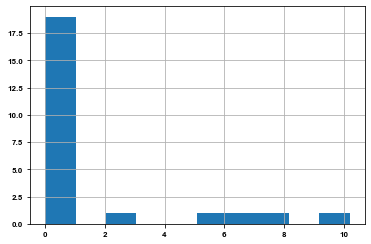

In [228]:
network_camels_ch_chem.bafu_naduf_distance.hist()

In [239]:
# Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 20), (20, 22), (22, 24), (24, 26), (26, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawa_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_naduf_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

color_categories_hq_dur = [(-np.inf, 2), (2, 4), (4, 6), (6, 8), (8, np.inf)]
color_categories_lq_freq = [(-np.inf, 25), (25, 50), (50, 75), (75, 100), (100, np.inf)]
color_categories_lq_dur = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_p_mean = [(-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, np.inf)]
color_categories_pet_mean = [(-np.inf, 1), (1, 1.5), (1.5, 2), (2, 2.5), (2.5, np.inf)]
color_categories_aridity = [(-np.inf, 0.5), (0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, np.inf)]
color_categories_p_seasonality = [(-np.inf, -0.5), (-0.5, 0.0), (0.0, 0.5), (0.5, 0.75), (0.75, np.inf)]
color_categories_frac_snow = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_hp_freq = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_hp_dur = [(-np.inf, 1.2), (1.2, 1.4), (1.4, 1.6), (1.6, 1.8), (1.8, np.inf)]
color_categories_lp_freq = [(-np.inf, 175), (175, 200), (200,225), (225, 250), (250, np.inf)]
color_categories_lp_dur = [(-np.inf, 4), (4, 6), (6, 8), (8, 10), (10, np.inf)]
color_categories_ele_mt_max = [(-np.inf, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, np.inf)]
color_categories_ele_mt_mean = [(-np.inf, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, np.inf)]
color_categories_slp_dg_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_elon_ratio = [(-np.inf, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, np.inf)]
color_categories_bedrk_dep = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_perc_low_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_medium_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_high_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_root_dep_mean = [(-np.inf, 40), (40, 60), (60, 80), (80, 100), (100, np.inf)]
color_categories_soil_tawc_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_sand_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_silt_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_clay_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_grav_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_lai_mean = [(-np.inf, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25), (0.25, np.inf)]
color_categories_ndvi_mean = [(-np.inf, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, np.inf)]
color_categories_lulc_2006_urban = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_lulc_2006_NonIrriAgri = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_Agric = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_forest = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_grass = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_agriculture = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_dam_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_lakes_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_area = [(-np.inf, 100), (100, 250), (250, 500), (500, 1000), (1000, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("BAFU [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "bafu_nawa_distance": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_nawa_distance, 0, 2, 0.5, 10, color_palette='custom'),
    "bafu_naduf_distance": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_naduf_distance, 0, 2, 0.5, 10, color_palette='custom'),


    "hq_dur":  generate_legend_and_color_mapping("HQ dur. [days]", color_categories_hq_dur, 0, 30, 1, 10),
    "lq_freq":  generate_legend_and_color_mapping("LQ freq. [day/year]", color_categories_lq_freq, 0, 350, 50, 10, color_palette='custom'),
    "lq_dur":  generate_legend_and_color_mapping("LQ dur. [days]", color_categories_lq_dur, 0, 150, 1, 10, color_palette='custom'),
    "p_mean":  generate_legend_and_color_mapping("P [mm/day]", color_categories_p_mean, 0, 10, 1, 10, color_palette='blues'),
    "pet_mean":  generate_legend_and_color_mapping("PET [mm/day]", color_categories_pet_mean, 0, 10, 1, 10, color_palette='custom'),
    "aridity": generate_legend_and_color_mapping("Aridity [-]", color_categories_aridity, 0, 5, 1, 10, color_palette='custom'),
    "p_seasonality":  generate_legend_and_color_mapping("P-Seasonality [-]", color_categories_p_seasonality, 0, 10, 1, 10, color_palette='default'),
    "frac_snow":  generate_legend_and_color_mapping("Snow frac. [-]", color_categories_frac_snow, 0, 10, 1, 10, color_palette='default'),
    "hp_freq":  generate_legend_and_color_mapping("HP freq. [days/year]", color_categories_hp_freq, 0, 10, 1, 10, color_palette='default'),
    "hp_dur": generate_legend_and_color_mapping("HP dur. [days]", color_categories_hp_dur, 0, 5, 1, 10, color_palette='default'),
    "lp_freq":  generate_legend_and_color_mapping("LP freq. [days/year]", color_categories_lp_freq, 0, 10, 0.2, 10, color_palette='default'),
    "lp_dur":  generate_legend_and_color_mapping("LP dur. [days]", color_categories_lp_dur, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_max":  generate_legend_and_color_mapping("Elev-max [m]", color_categories_ele_mt_max, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_mean":  generate_legend_and_color_mapping("Mean elev. [m]", color_categories_ele_mt_mean, 0, 10, 1, 10, color_palette='default'),
    "slp_dg_mean":  generate_legend_and_color_mapping("Mean slope [d]", color_categories_slp_dg_mean, 0, 10, 1, 10, color_palette='default'),
    "elon_ratio":  generate_legend_and_color_mapping("Elon. ratio [-]", color_categories_elon_ratio, 0, 10, 1, 10, color_palette='default'),
    "bedrk_dep":  generate_legend_and_color_mapping("Bedrock depth [m]", color_categories_bedrk_dep, 0, 10, 1, 10, color_palette='default'),        
    "perc_low_perm":  generate_legend_and_color_mapping("Low perm. [%]", color_categories_perc_low_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_medium_perm":  generate_legend_and_color_mapping("Medium perm. [%]", color_categories_perc_medium_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_high_perm":  generate_legend_and_color_mapping("High perm. [%]", color_categories_perc_high_perm, 0, 10, 1, 10, color_palette='default'),
    "root_dep_mean":  generate_legend_and_color_mapping("Root depth [cm]", color_categories_root_dep_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_tawc_mean":  generate_legend_and_color_mapping("TAWC [cm]", color_categories_soil_tawc_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_sand_mean":  generate_legend_and_color_mapping("Sand [%]", color_categories_soil_fra_sand_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_silt_mean":  generate_legend_and_color_mapping("Silt [%]", color_categories_soil_fra_silt_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_clay_mean":  generate_legend_and_color_mapping("Clay [%]", color_categories_soil_fra_clay_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_grav_mean":  generate_legend_and_color_mapping("Gravel [%]", color_categories_soil_fra_grav_mean, 0, 10, 1, 10, color_palette='default'),
    "lai_mean":  generate_legend_and_color_mapping("LAI [-]", color_categories_lai_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "ndvi_mean":  generate_legend_and_color_mapping("NDVI [-]", color_categories_ndvi_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_urban":  generate_legend_and_color_mapping("Urban [-]", color_categories_lulc_2006_urban, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_NonIrriAgri":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_NonIrriAgri, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_Agric":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_Agric, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_forest":  generate_legend_and_color_mapping("Forests [-]", color_categories_lulc_2006_forest, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_grass":  generate_legend_and_color_mapping("Grasslands [-]", color_categories_lulc_2006_grass, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_agriculture":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_agriculture, 0, 10, 1, 10, color_palette='custom'),
    "dam_num":  generate_legend_and_color_mapping("Dams [-]", color_categories_dam_num, 0, 10, 1, 10, color_palette='default'),
    "lakes_num":  generate_legend_and_color_mapping("Lakes [-]", color_categories_lakes_num, 0, 10, 1, 10, color_palette='default'),
    "area_estreams":  generate_legend_and_color_mapping("Area [km2]", color_categories_area, 0, 10, 1, 10, color_palette='default'),
}

<AxesSubplot:>

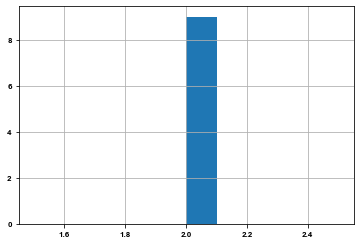

In [138]:
counts_datasets_df["count_isot"].hist()


In [161]:
mean_bafu_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

mean_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

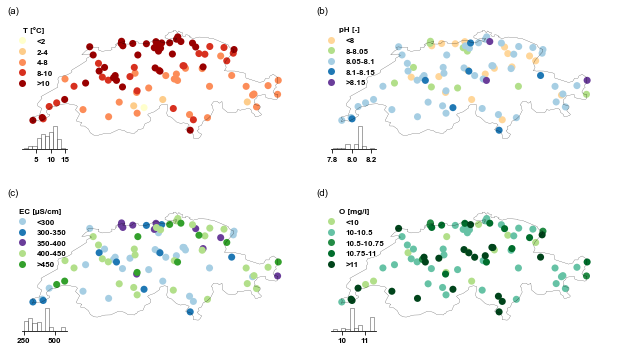

In [106]:
# List of variables
variable_list = ["temp_mean", "ph_mean", "EC_mean", "o_mean"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_bafu_daily_df, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon,geometry,color_category,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
camels_id,,,,,,,,,,,,
2009,7.309235,8.074447,289.671877,11.381961,46.349564,6.888617,POINT (6.88862 46.34956),4-8,7.331974,8.086416,290.946493,11.429468
2016,11.951728,8.016643,376.216648,10.413693,47.482537,8.194880,POINT (8.19488 47.48254),10-inf,12.050905,8.016090,378.188415,10.424246
2018,11.791203,8.047029,259.131009,10.344518,47.421030,8.271271,POINT (8.27127 47.42103),10-inf,12.050659,8.101378,262.453604,10.339424
2044,10.727570,8.228406,484.676912,10.754218,47.596523,8.681980,POINT (8.68198 47.59652),10-inf,10.862653,8.222887,483.017029,10.736399
2067,5.520395,8.228406,484.676912,10.754218,46.885784,10.465420,POINT (10.46542 46.88578),4-8,5.421894,NaN,NaN,NaN
2068,9.070457,7.808469,259.291146,11.213567,46.163386,8.910326,POINT (8.91033 46.16339),8-10,9.171399,7.812256,259.539569,11.217677
2085,11.768050,8.059490,337.111956,10.164493,47.055592,7.184345,POINT (7.18435 47.05559),10-inf,12.157995,8.073854,339.961334,10.230807
2091,12.283897,7.953208,367.310089,10.763025,47.560711,7.799896,POINT (7.79990 47.56071),NaN,NaN,NaN,NaN,NaN
2106,10.964754,7.953208,367.310089,10.763025,47.518322,7.618783,POINT (7.61878 47.51832),10-inf,10.843690,NaN,NaN,NaN


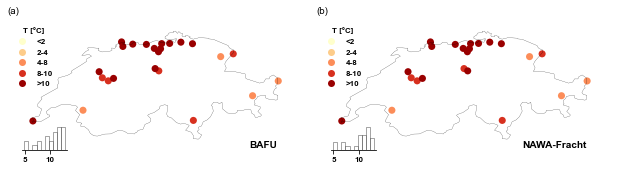

In [207]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

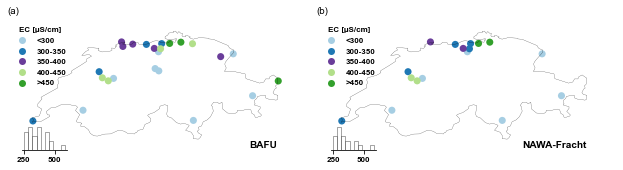

In [209]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

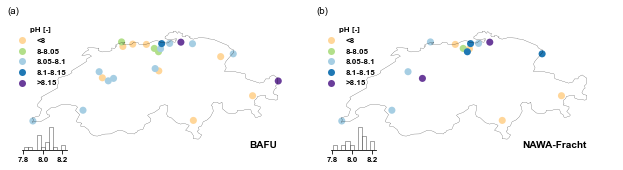

In [212]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

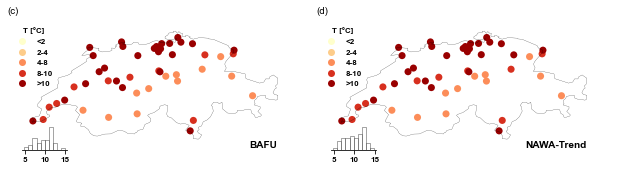

In [206]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

In [306]:
mean_daily_df[["temp_mean", "temp_mean_naduf", "temp_mean_nawa"]].corr()

,temp_mean,temp_mean_naduf,temp_mean_nawa
temp_mean,1.000000,0.988416,0.976464
temp_mean_naduf,0.988416,1.000000,0.970417
temp_mean_nawa,0.976464,0.970417,1.000000


In [307]:
mean_daily_df.corr()

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
temp_mean,1.000000,0.024805,-0.008467,0.045217,0.502281,-0.383334,0.988416,0.204715,0.357356,-0.454852,0.976464,0.164507,0.448234,-0.696385
ph_mean,0.024805,1.000000,0.276240,0.265602,-0.093455,-0.065460,0.028177,0.882433,0.375951,0.000177,0.213853,0.059229,0.134574,-0.360182
EC_mean,-0.008467,0.276240,1.000000,-0.443307,0.121056,0.072457,0.179448,0.247881,0.930455,-0.403074,0.164891,0.282002,0.361383,-0.006575
o_mean,0.045217,0.265602,-0.443307,1.000000,-0.159049,-0.098314,-0.341032,0.014384,-0.343381,0.947324,-0.200291,-0.131804,-0.188172,0.139644
lat,0.502281,-0.093455,0.121056,-0.159049,1.000000,0.167916,0.465836,0.379032,0.413172,-0.267784,0.394697,0.177264,0.318746,-0.107273
lon,-0.383334,-0.065460,0.072457,-0.098314,0.167916,1.000000,-0.577087,-0.242800,-0.099863,0.120624,-0.169673,-0.028790,-0.272000,0.162652
temp_mean_naduf,0.988416,0.028177,0.179448,-0.341032,0.465836,-0.577087,1.000000,0.245520,0.366251,-0.445482,0.970417,0.088660,0.320426,-0.481426
ph_mean_naduf,0.204715,0.882433,0.247881,0.014384,0.379032,-0.242800,0.245520,1.000000,0.397866,0.146192,0.230820,0.751434,0.501489,-0.214985
EC_mean_naduf,0.357356,0.375951,0.930455,-0.343381,0.413172,-0.099863,0.366251,0.397866,1.000000,-0.233829,0.322213,0.483671,0.988672,-0.169075
o_mean_naduf,-0.454852,0.000177,-0.403074,0.947324,-0.267784,0.120624,-0.445482,0.146192,-0.233829,1.000000,-0.435698,-0.248142,-0.194794,0.887793


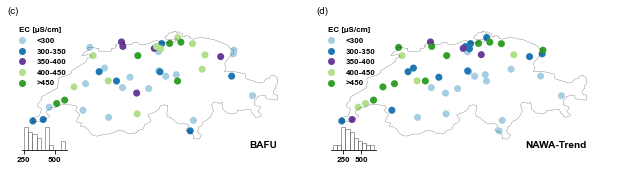

In [210]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

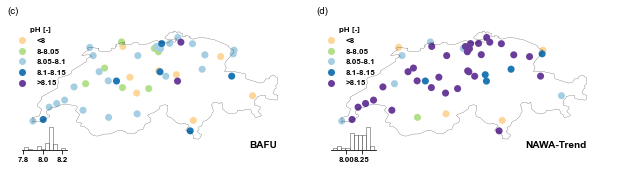

In [213]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

# Make a plot with the time-series

In [339]:

# Read and process the bafu_2009 dataset
bafu_2009 = pd.read_csv(r"results/timeseries/daily/CAMELS_CH_Chem_daily_2634.csv")
bafu_2009['date'] = pd.to_datetime(bafu_2009['date'])  # Convert 'date' column to datetime
bafu_2009.set_index('date', inplace=True)  # Set the 'date' column as index
bafu_2009_daily = bafu_2009.resample('M').mean()  # Resample to daily frequency, calculating mean for each day

# Read and process the naduf_2009 dataset
naduf_2009 = pd.read_csv(r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_2634.csv")
naduf_2009['date_start'] = pd.to_datetime(naduf_2009['date_start'])  # Convert 'date_start' column to datetime
naduf_2009.set_index('date_start', inplace=True)  # Set the 'date_start' column as index
naduf_2009_daily = naduf_2009.resample('M').mean()  # Resample to daily frequency, calculating mean for each day

# Read and process the nawa_2009 dataset
nawa_2009 = pd.read_csv(r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_2634.csv")
nawa_2009['date'] = pd.to_datetime(nawa_2009['date'])  # Convert 'date' column to datetime
nawa_2009.set_index('date', inplace=True)  # Set the 'date' column as index
nawa_2009_daily = nawa_2009.resample('M').mean()  # Resample to daily frequency, calculating mean for each day

bafu_2009_daily.temp.plot()
naduf_2009_daily.temp_water.plot()
nawa_2009_daily.temp_water.plot()


<AxesSubplot:xlabel='date'>

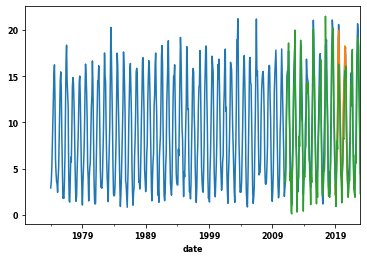

In [340]:
bafu_2009_daily.temp.plot()
naduf_2009_daily.temp_water.plot()
nawa_2009_daily.temp_water.plot()

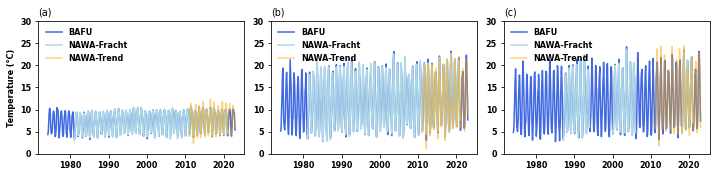

In [363]:
import pandas as pd
import matplotlib.pyplot as plt

# List of years to process
years = [2009, 2016, 2018]

# Base file paths (with placeholders for the year)
bafu_base_path = r"results/timeseries/daily/CAMELS_CH_Chem_daily_{}.csv"
naduf_base_path = r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_{}.csv"
nawa_base_path = r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_{}.csv"

# Create subplots (3 rows for each year)
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))  # 3 rows, 1 column

# Loop through each year
for i, year in enumerate(years):
    # Dynamically generate file paths by replacing the year in the base path
    bafu_file = bafu_base_path.format(year)
    naduf_file = naduf_base_path.format(year)
    nawa_file = nawa_base_path.format(year)
    
    # Read and process the bafu dataset
    bafu_df = pd.read_csv(bafu_file)
    bafu_df['date'] = pd.to_datetime(bafu_df['date'])
    bafu_df.set_index('date', inplace=True)
    bafu_daily = bafu_df.resample('M').mean()

    # Read and process the naduf dataset
    naduf_df = pd.read_csv(naduf_file)
    naduf_df['date_start'] = pd.to_datetime(naduf_df['date_start'])
    naduf_df.set_index('date_start', inplace=True)
    naduf_daily = naduf_df.resample('M').mean()

    # Read and process the nawa dataset
    nawa_df = pd.read_csv(nawa_file)
    nawa_df['date'] = pd.to_datetime(nawa_df['date'])
    nawa_df.set_index('date', inplace=True)
    nawa_daily = nawa_df.resample('M').mean()

    # Plot bafu, naduf, and nawa on the current subplot
    axes[i].plot(bafu_daily.index, bafu_daily['temp'], label='BAFU', color='royalblue')
    axes[i].plot(naduf_daily.index, naduf_daily['temp_water'], label='NAWA-Fracht', color='lightblue')
    axes[i].plot(nawa_daily.index, nawa_daily['temp_water'], label='NAWA-Trend', color='orange', alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f'({chr(97+i)})', loc="left")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('Temperature (°C)')

    axes[i].legend(frameon=False, loc="upper left")
    axes[i].grid(False)
    axes[i].set_ylim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [338]:
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,POINT (557660.000 133280.000)
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,POINT (593770.000 118630.000)
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,POINT (657000.000 259360.000)
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (662830.000 252580.000)
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (649930.000 177380.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (830800.000 168700.000)
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (669900.000 154075.000)
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN,POINT (663700.000 213630.000)
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (700710.000 218125.000)


# Count number of measurments (variables)

In [121]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
counts_datasets_df = pd.DataFrame(data, columns=['camels_id', 'count_bafu']).set_index('camels_id')

counts_datasets_df

100%|██████████| 87/87 [00:05<00:00, 14.60it/s]


,count_bafu
camels_id,
2009,4
2011,4
2016,4
2018,4
2019,4
...,...
2615,4
2617,4
2623,4


In [122]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NADUF"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_naduf"] = data_df["count"]

counts_datasets_df

100%|██████████| 24/24 [00:00<00:00, 36.46it/s]


,count_bafu,count_naduf
camels_id,,
2009,4,35.0
2011,4,NaN
2016,4,32.0
2018,4,32.0
2019,4,NaN
...,...,...
2615,4,NaN
2617,4,NaN
2623,4,NaN


In [123]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NAWA"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_nawa"] = data_df["count"]

counts_datasets_df

100%|██████████| 76/76 [00:02<00:00, 26.60it/s]


,count_bafu,count_naduf,count_nawa
camels_id,,,
2009,4,35.0,19.0
2011,4,NaN,20.0
2016,4,32.0,22.0
2018,4,32.0,20.0
2019,4,NaN,21.0
...,...,...,...
2615,4,NaN,NaN
2617,4,NaN,NaN
2623,4,NaN,NaN


In [136]:
# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_isot"] = data_df["count"]

counts_datasets_df

100%|██████████| 9/9 [00:00<00:00, 91.74it/s]


,count_bafu,count_naduf,count_nawa,lat,lon,geometry,color_category,count_isot
camels_id,,,,,,,,
2009,4,35.0,19.0,46.349564,6.888617,POINT (6.88862 46.34956),-inf-20,2.0
2011,4,NaN,20.0,46.219089,7.357908,POINT (7.35791 46.21909),-inf-20,NaN
2016,4,32.0,22.0,47.482537,8.194880,POINT (8.19488 47.48254),20-22,2.0
2018,4,32.0,20.0,47.421030,8.271271,POINT (8.27127 47.42103),-inf-20,NaN
2019,4,NaN,21.0,46.745743,8.092031,POINT (8.09203 46.74574),20-22,2.0
...,...,...,...,...,...,...,...,...
2615,4,NaN,NaN,47.561717,7.586642,POINT (7.58664 47.56172),NaN,NaN
2617,4,NaN,NaN,46.629638,10.453157,POINT (10.45316 46.62964),NaN,NaN
2623,4,NaN,NaN,46.534322,8.349802,POINT (8.34980 46.53432),NaN,NaN


In [137]:
counts_datasets_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]
counts_datasets_df

,count_bafu,count_naduf,count_nawa,lat,lon,geometry,color_category,count_isot
camels_id,,,,,,,,
2009,4,35.0,19.0,46.349564,6.888617,POINT (6.88862 46.34956),-inf-20,2.0
2011,4,NaN,20.0,46.219089,7.357908,POINT (7.35791 46.21909),-inf-20,NaN
2016,4,32.0,22.0,47.482537,8.194880,POINT (8.19488 47.48254),20-22,2.0
2018,4,32.0,20.0,47.421030,8.271271,POINT (8.27127 47.42103),-inf-20,NaN
2019,4,NaN,21.0,46.745743,8.092031,POINT (8.09203 46.74574),20-22,2.0
...,...,...,...,...,...,...,...,...
2615,4,NaN,NaN,47.561717,7.586642,POINT (7.58664 47.56172),NaN,NaN
2617,4,NaN,NaN,46.629638,10.453157,POINT (10.45316 46.62964),NaN,NaN
2623,4,NaN,NaN,46.534322,8.349802,POINT (8.34980 46.53432),NaN,NaN


In [143]:
river_ch = gpd.read_file('data/shps/rivers_ch_dissolved.shp')
river_ch

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,21000049,18.849608,13.158794,1.432472,0.003752,237.841082,2,70.8,0.003752,21000042,2,21000331,21000340,0,0,"MULTILINESTRING ((5.96154 46.13500, 5.96167 46..."


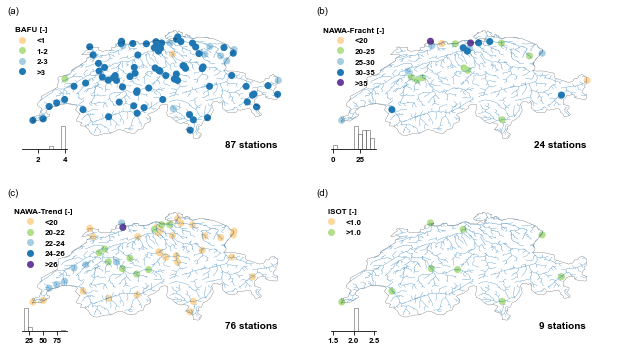

In [151]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "9 stations"]
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    river_ch.plot(ax=axs[i], linewidth=0.25)
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()
 
# Save or display the plot
plt.show()

# Distance between obeservation points

In [218]:
network_camels_ch_chem[network_camels_ch_chem.bafu_naduf_distance>0]

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
14,2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,1613.3,...,113500.0,1613.3,10.2,Riazzino,713670.0,113500.0,1613.268070,0.0,NaN,POINT (713670.000 113500.000)
51,2243,2243.0,1836.0,1345.0,NaN,"Baden, Limmatpromenade",Limmat,665640,258690,2393.7,...,260770.0,2412.0,7.1,Turgi,661300.0,260850.0,2412.382874,6.7,NaN,POINT (665640.000 258690.000)
88,2462,2462.0,2064.0,2064.0,NIO06,S-chanf,Inn,795800,165910,616.0,...,165910.0,616.0,3.0,S-chanf,795800.0,165910.0,615.950719,0.0,NaN,POINT (795800.000 165910.000)
89,2467,2467.0,1831.0,NaN,NaN,Gümmenen,Saane,585100,199240,1881.3,...,199240.0,1881.3,5.3,NaN,NaN,NaN,NaN,NaN,NaN,POINT (585100.000 199240.000)
109,2613,2613.0,2078.0,2078.0,NIO08,"Weil, Palmrainbrücke (D)",Rhein,611740,272310,36404.4,...,272310.0,36404.4,7.2,"Weil, Palmrainbrücke",611740.0,272310.0,36404.416302,0.0,NaN,POINT (611740.000 272310.000)


In [219]:
network_camels_ch_chem[network_camels_ch_chem.bafu_nawa_distance>0]

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (662830.000 252580.000)
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (649930.000 177380.000)
5,2029,2029.0,NaN,1142.0,NaN,"Brügg, Aegerten",Aare,588220,219020,8248.6,...,NaN,NaN,NaN,Nidau,584709.0,219090.0,8243.100000,3.8,NaN,POINT (588220.000 219020.000)
6,2030,2030.0,NaN,1145.0,NIO07,Thun,Aare,613230,179280,2459.3,...,NaN,NaN,NaN,Thun Schadau,615219.0,177345.0,2451.536407,3.2,NaN,POINT (613230.000 179280.000)
8,2034,2034.0,NaN,1432.0,NaN,"Payerne, Caserne d'aviation",Broye,561660,187320,415.9,...,NaN,NaN,NaN,Domdidier,566187.0,191947.0,428.900220,6.6,NaN,POINT (561660.000 187320.000)
9,2044,2044.0,1823.0,1044.0,NaN,Andelfingen,Thur,693510,272500,1701.6,...,272500.0,1701.6,0.0,Vor ARA Andelfingen,693086.0,272856.0,1701.627120,0.6,NaN,POINT (693510.000 272500.000)
11,2056,2056.0,NaN,4922.0,NaN,Seedorf,Reuss,690085,193210,833.2,...,NaN,NaN,NaN,"Attinghausen, Allmeinigärtli",690740.0,191720.0,818.855513,1.6,NaN,POINT (690085.000 193210.000)
12,2063,NaN,NaN,1108.0,NaN,Murgenthal,Aare,629665,235150,10059.4,...,NaN,NaN,NaN,Murgenthal,629760.0,235242.0,10059.355199,0.3,NaN,POINT (629665.000 235150.000)
15,2070,2070.0,NaN,1162.0,NaN,Emmenmatt,Emme,623610,200420,443.0,...,NaN,NaN,NaN,"Emmenmatt, Mitte",623700.0,199790.0,230.974056,0.7,Q is calculated by id_2070 minus id_2603,POINT (623610.000 200420.000)
19,2099,NaN,NaN,1053.0,NaN,"Zürich, Unterhard",Limmat,682055,249430,2173.9,...,NaN,NaN,NaN,Hönggersteg,679609.0,250356.0,2186.067125,2.7,NaN,POINT (682055.000 249430.000)


In [224]:
((network_camels_ch_chem.area_nawa - network_camels_ch_chem.area_camels)/network_camels_ch_chem.area_camels).max()

0.4199422502043134

<AxesSubplot:>

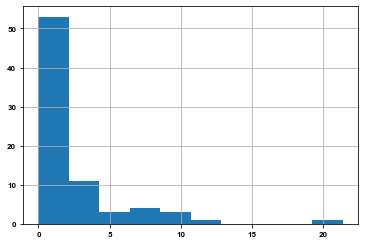

In [225]:
network_camels_ch_chem.bafu_nawa_distance.hist()

<AxesSubplot:>

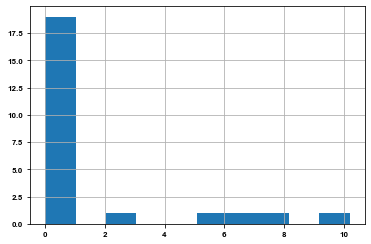

In [226]:
network_camels_ch_chem.bafu_naduf_distance.hist()

In [232]:
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

In [233]:
network_camels_ch_chem_gdf

,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,area_bafu,...,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry,x_coord,y_coord
basin_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,6.888617,46.349564,5239.4,5238.08,...,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,POINT (6.88862 46.34956),6.888617,46.349564
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,7.357908,46.219089,3372.4,3372.39,...,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,POINT (7.35791 46.21909),7.357908,46.219089
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,8.194880,47.482537,11681.3,11681.18,...,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,POINT (8.19488 47.48254),8.194880,47.482537
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,8.271271,47.421030,3385.8,3385.74,...,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (8.27127 47.42103),8.271271,47.421030
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,8.092031,46.745743,555.2,555.15,...,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (8.09203 46.74574),8.092031,46.745743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,10.453157,46.629638,128.6,128.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.45316 46.62964),10.453157,46.629638
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,8.349802,46.534322,93.3,93.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (8.34980 46.53432),8.349802,46.534322
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,8.277285,47.070628,478.3,478.27,...,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN,POINT (8.27728 47.07063),8.277285,47.070628


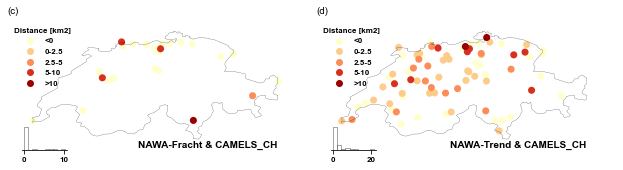

In [241]:
#mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["bafu_naduf_distance", "bafu_nawa_distance"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["NAWA-Fracht & CAMELS_CH", "NAWA-Trend & CAMELS_CH"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

# Isotopes

100%|██████████| 9/9 [00:00<00:00, 193.37it/s]


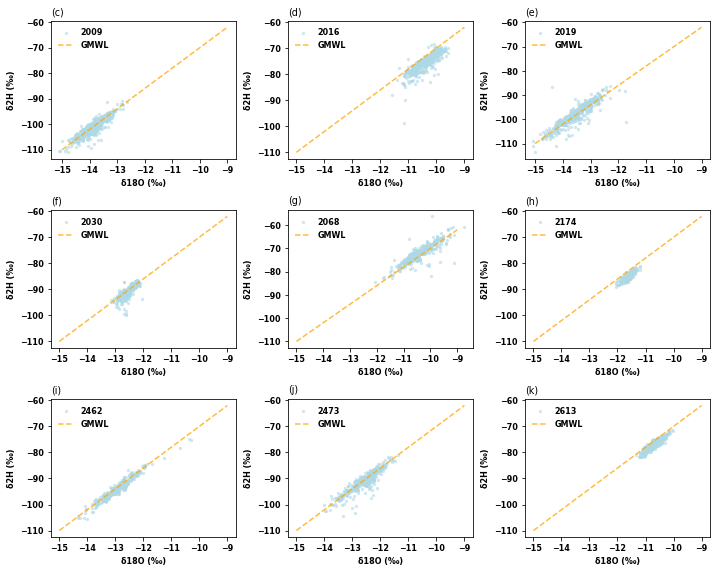

In [302]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import tqdm


# Set font properties using rcParams
mpl.rcParams['font.family'] = 'helvetica'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Function to extract basin_id from the filename
def get_basin_id_from_filename(filename):
    basename = os.path.basename(filename)
    # Assuming the basin_id is the last part of the file name before ".csv"
    basin_id = basename.split('_')[-1].split('.')[0]
    return basin_id


# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize the number of rows and columns for subplots
num_plots = 9  # Number of subplots (e.g., 9)
nrows = 3  # 3 rows
ncols = 3  # 3 columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each CSV file and create a subplot
for i, file in enumerate(tqdm.tqdm(csv_files[:num_plots])):  # Only process the first 9 files
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Extract the basin_id
    basin_id = get_basin_id_from_filename(file)

    # Extract the relevant columns (assuming they are named 'delta_18o' and 'delta_2h')
    delta_18o = df['delta_18o']
    delta_2h = df['delta_2h']

    # Plot δ2H vs δ18O for your data on the current axis
    axes[i].scatter(delta_18o, delta_2h, label=f'{basin_id}', color='lightblue', marker='o', s=5, alpha=0.5)

    # Plot the Global Meteoric Water Line (GMWL) on the current axis
    gmwl_d18O = range(-15, -8)  # Adjust the range based on your δ18O values
    gmwl_d2H = [8 * d18O + 10 for d18O in gmwl_d18O]
    axes[i].plot(gmwl_d18O, gmwl_d2H, label='GMWL', color='orange', linestyle='--', alpha=0.75)

    # Set labels, title, and limits for each subplot
    axes[i].set_xlabel('δ18O (‰)')
    axes[i].set_ylabel('δ2H (‰)')
    axes[i].set_title(f'({chr(99+i)})', loc="left")
    #axes[i].grid(True)
    axes[i].legend(frameon=False)
    #axes[i].set_xlim(-15, -8)
    #axes[i].set_ylim(-110, -80)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_tv_isotopes.png', dpi=300, bbox_inches='tight')


In [279]:
file

'results/interval_samples/isotopes\\CAMELS_CH_Chem_isotopes_2613.csv'

# End